# CreditCard Fraud Detection

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from pylab import rcParams
import itertools

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Analysis

In [ ]:
data.isnull().values.any()

False

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Now plot Transaction class distribution

Text(0, 0.5, 'Fraquency')

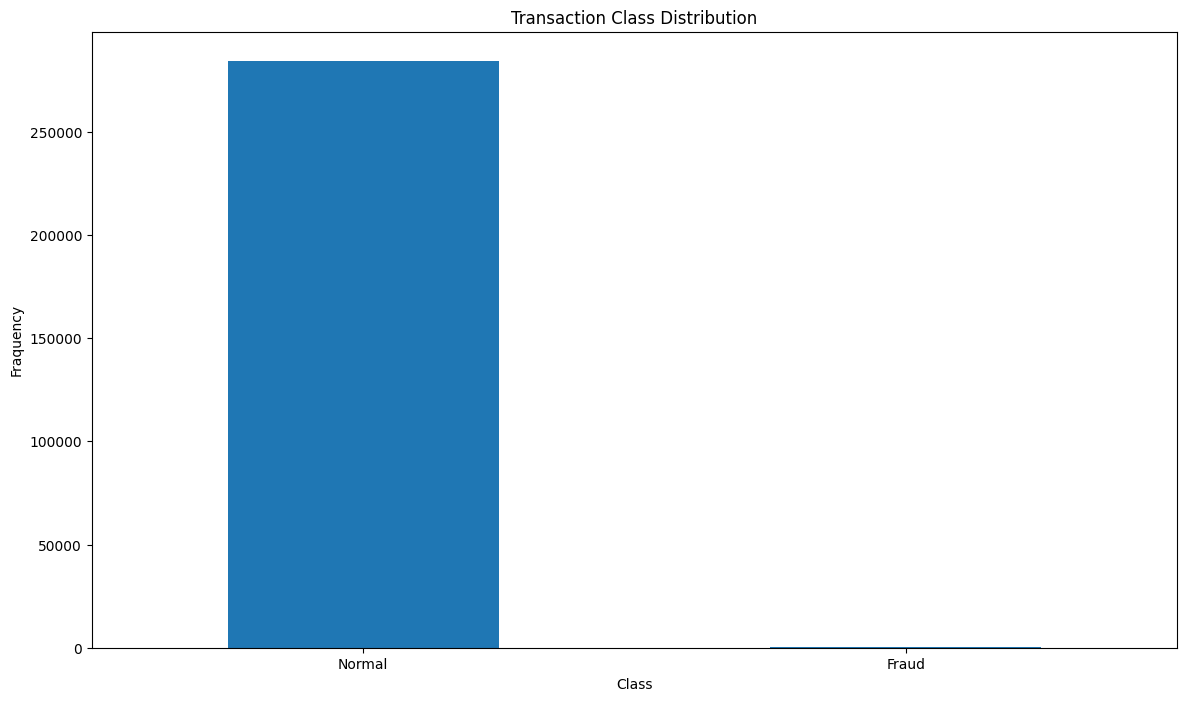

In [ ]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

From the above figure we can see that this is an extremely imbalanced dataset

In [ ]:
## separate the Fraud and the Normal dataset for future reference
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [ ]:
# Statistics of Amount of Fraud Transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Statistics of Amount of Normal Transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

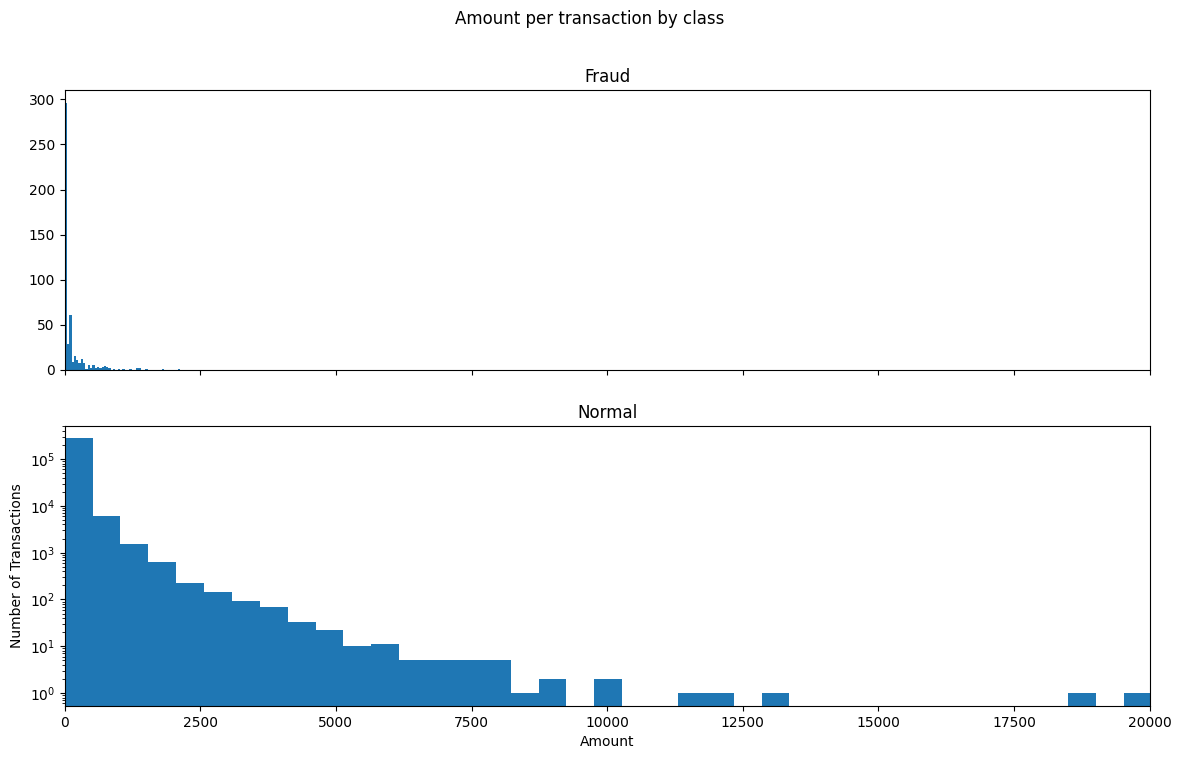

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(Fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

Now let's check how many fraudulent transaction occur in difference time frame

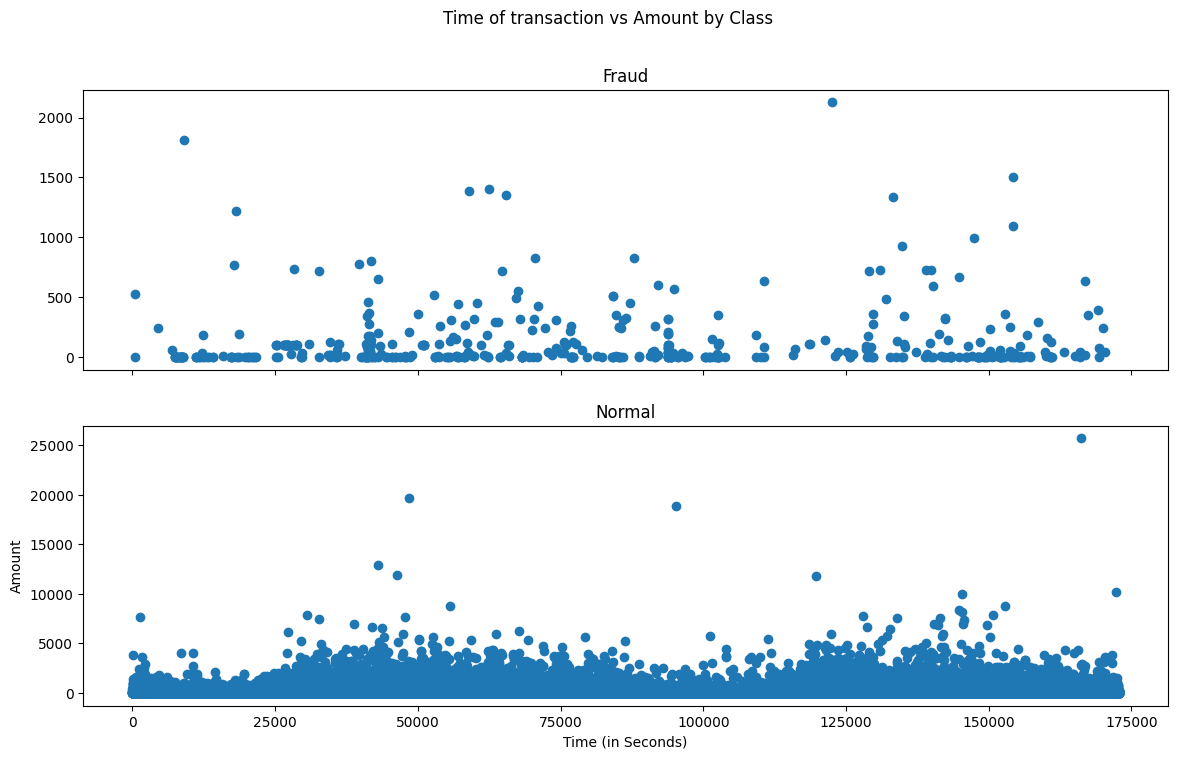

In [ ]:
# Create 2 graphs as 2 rows and 1 common column
# between below two graphs share x-axis as common
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

# Plot time against amount for fraud transaction
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

# Plot time against amount for Normal transaction
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

# Set X-axis label and y axis label and show the result
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Data Sampling

In [ ]:

# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)
# data_sample = data

data_sample.shape

(28481, 31)

In [ ]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.0017234102419808666
49
28432


In [ ]:
# Create independent and dependent features

# create a list of column names
columns = data_sample.columns.to_list()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['Class','V15','V17','V24','V27','Time']]

# Define a random state
# state = np.random.RandomState(42)

X = data_sample[columns]
Y = data_sample['Class']

# print(state)
print(X.columns)
print(X.shape)
print(Y.shape)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V25', 'V26', 'V28', 'Amount'],
      dtype='object')
(28481, 25)
(28481,)


## Scaling

In [ ]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(X)
X_scaled = data_scaled.transform(X)

In [ ]:
X_scaled

array([[9.29498718e-01, 7.74794449e-01, 8.82407521e-01, ...,
        4.12739768e-01, 3.93704186e-01, 9.10638856e-05],
       [9.24765464e-01, 8.00659204e-01, 9.23629134e-01, ...,
        4.62584143e-01, 3.87232946e-01, 1.00729885e-04],
       [9.36343571e-01, 7.98175390e-01, 9.13609189e-01, ...,
        4.69847331e-01, 3.88555792e-01, 4.52775744e-05],
       ...,
       [9.36405459e-01, 7.97379056e-01, 9.27956944e-01, ...,
        3.67421101e-01, 3.91497770e-01, 9.97124111e-04],
       [8.60268518e-01, 8.35101773e-01, 8.14745122e-01, ...,
        4.54496116e-01, 3.98982561e-01, 4.68037848e-05],
       [9.72059154e-01, 7.87137641e-01, 8.61865994e-01, ...,
        4.78382054e-01, 3.85550098e-01, 9.83896954e-04]])

In [ ]:
Y.shape

(28481,)

## Method to find min_sample

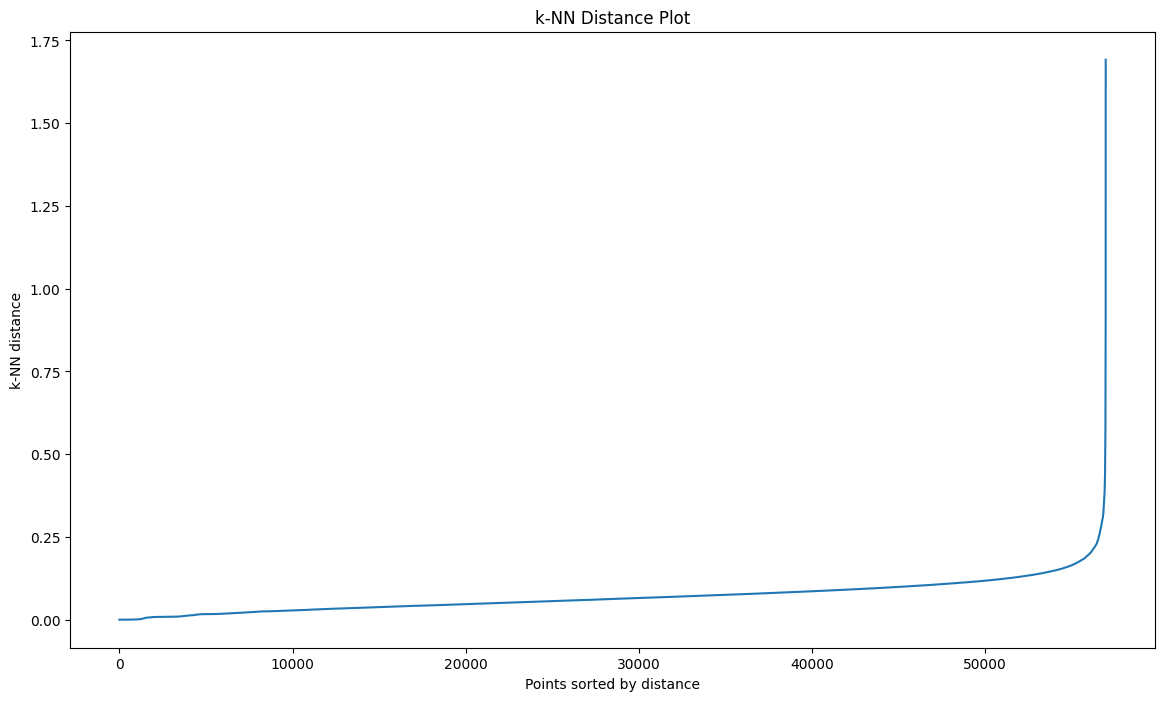

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Step 1: Calculate the k-nearest neighbors
k = 4  # k is usually set to min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Step 2: Sort the distances (4th column)
distances = np.sort(distances[:, k-1], axis=0)

# Step 3: Plot the distances
plt.plot(distances)
plt.ylabel('k-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-NN Distance Plot')
plt.show()

# The "elbow" point is a good candidate for `eps`

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Create DBSCAN object
dbscan = DBSCAN(eps=0.25, min_samples=5)

In [ ]:
# Fitting the model
model = dbscan.fit(X_scaled)

In [ ]:
# classification result as labels
labels = model.labels_

In [ ]:
# Find unique values
unique_values = np.unique(labels)

# Print unique values
print(unique_values)

[-1  0  1  2]


Can't really plot because this cannot be represented in 2D

### Conclusion

In [ ]:
outlier_indices = np.where(labels == -1)[0]
print(len(outlier_indices))

277


In [ ]:
"""ONLY RUN THIS ONCE"""
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
prediction = np.where(labels == -1, 1, 0)

In [ ]:
class_names=np.array(['0','1']) # Binary label
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.19      0.62      0.30        87

    accuracy                           1.00     56961
   macro avg       0.60      0.81      0.65     56961
weighted avg       1.00      1.00      1.00     56961



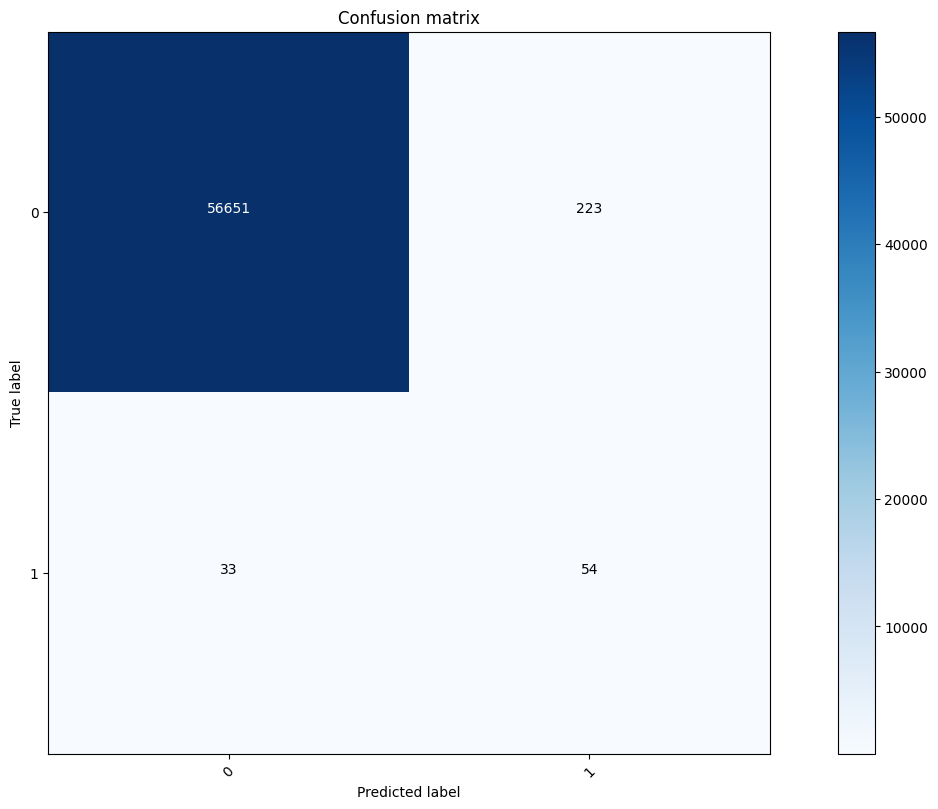

In [ ]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, prediction))
cm = confusion_matrix(Y, prediction)
plot_confusion_matrix(cm,class_names)

In [ ]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y, prediction))
print(confusion_matrix(Y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.19      0.62      0.30        87

    accuracy                           1.00     56961
   macro avg       0.60      0.81      0.65     56961
weighted avg       1.00      1.00      1.00     56961

[[56651   223]
 [   33    54]]


## OPTICS Based

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1574.0,-0.615776,0.654356,2.618793,0.857434,-0.487340,0.593957,-0.095191,0.426786,0.011607,...,0.010440,0.113631,-0.313035,-0.015388,0.213878,-0.268579,0.117815,0.075734,9.99,0
240932,150813.0,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,...,0.455767,0.388102,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,0.76,0
3701,3169.0,-0.315540,1.054303,1.484711,1.138262,0.394713,-0.168883,0.737923,-0.061284,-0.952381,...,0.005626,0.094740,0.024370,0.091800,-0.463470,-0.457328,0.194541,0.166039,19.60,0
153365,98752.0,-3.580417,4.100916,-2.577720,-1.476718,-0.006201,-2.008418,0.887262,0.304192,2.879710,...,-0.194866,0.571678,-0.001519,0.009117,0.321669,0.034900,0.785417,0.353092,0.92,0


In [ ]:
# Features and labels
X = data_sample.drop(columns=['Class'])
y = data_sample['Class']

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply the OPTICS algorithm
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1)
optics.fit(X_scaled)

OPTICS(min_cluster_size=0.1, min_samples=10)

In [ ]:
# Create labels for the detected clusters
labels = optics.labels_

In [ ]:
# Label anomalies as 1 and normal points as 0
# Noise points are labeled as -1 in OPTICS
anomalies = (labels == -1).astype(int)

In [ ]:

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y, anomalies)
class_report = classification_report(y, anomalies, target_names=['Non-Fraud', 'Fraud'])

print(conf_matrix)
print(class_report)

[[28403    29]
 [   46     3]]
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     28432
       Fraud       0.09      0.06      0.07        49

    accuracy                           1.00     28481
   macro avg       0.55      0.53      0.54     28481
weighted avg       1.00      1.00      1.00     28481

